# Importing the Libraries

### To aid in the importing of custom libraries

In [1]:
import os
import sys
sys.path.append("D:/M.Sc Dissertation/")

### Importing the libraries for testing whether the user is strong or weak learner

In [2]:
from PIL import Image
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time
import numpy as np
import random
import re

In [3]:
from RecallWordsInReverse import RecallWordsInReverse
from PictureIdentification import PictureIdentification
from WordIdentification import WordIdentification
from WordPairQuestions import WordPairQuestions
from ImagePairQuestions import ImagePairQuestions

import language_questions
import language_answers
import analytical_questions
import analytical_answers

### Importing the libraries for creation of the LLM

In [4]:
from langchain.chains import ConversationalRetrievalChain
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import DirectoryLoader
from langchain.indexes import VectorstoreIndexCreator

In [5]:
import constants

### Importing the libraries for validation of the model

In [6]:
from uptrain import EvalLLM, Evals
import json

D:\Anaconda\Lib\site-packages\lazy_loader\__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)


# Testing Whether the Student is a Strong or Weak Learner

### Function to calculate the score of the student for memorization parameter

In [7]:
def MemoryTest(question_filename, answer_filename, actual_filename, dummy_filename): #For memory parameter
    
    print("There will be 10 images with pairs. After the 10 questions, type in the answer and press enter. DO NOT add plural (s, es, etc.) in your answers!!")
    time.sleep(10)
    score1 = ImagePairQuestions(question_filename, answer_filename)
    clear_output(wait = True)
    
    print("There will be 10 pairs of words. After the 10 questions, type in the answer and press enter. DO NOT add plural (s, es, etc.) in your answers!!")
    time.sleep(10)
    score2 = WordPairQuestions()
    clear_output(wait = True)
    
    print("There will be 10 original words. After the 10 original words, a new list of 10 words will come with half actual and half dummy words. Type in the words that were in the original list and press enter. DO NOT add plural (s, es, etc.) in your answers!!")
    time.sleep(10)
    score3 = WordIdentification()
    clear_output(wait = True)
    
    print("There will be 10 original pictures. After the 10 original pictures, new 10 pictures will come with half actual and half dummy pictures. Type in the indices of the pictures that were in the original list and press enter.")
    time.sleep(10)
    score4 = PictureIdentification(actual_filename, dummy_filename)
    clear_output(wait = True)
    
    print("There will be a list of 10 words. Write the list of words in reverse. Type in one word and press enter.")
    time.sleep(10)
    score5 = RecallWordsInReverse()
    clear_output(wait = True)
    
    net_score = (score1 + score2 + score3 + score4 + score5)/50 * 100
    return net_score

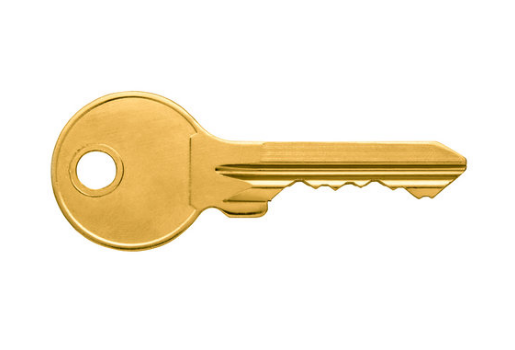

KeyboardInterrupt: Interrupted by user

In [10]:
question_filename = r"D:\M.Sc Dissertation\Memory-20240314T105030Z-001\Memory\Word Pairs\Questions"
answer_filename = r"D:\M.Sc Dissertation\Memory-20240314T105030Z-001\Memory\Word Pairs\Answers"
actual_filename = r"D:\M.Sc Dissertation\Memory-20240314T105030Z-001\Memory\Word Identification\Actual"
dummy_filename = r"D:\M.Sc Dissertation\Memory-20240314T105030Z-001\Memory\Word Identification\Dummy"

memory_score = MemoryTest(question_filename, answer_filename, actual_filename, dummy_filename)

### Function to calculate the score of the student for analytical/logical parameter

In [ ]:
def AnalyticalTest(): #for analytical skill parameter
    
    question_list = analytical_questions.questions
    answer_list = analytical_answers.answers
    num_questions = 20
    score = 0
    
    random_questions = random.sample(question_list, num_questions)
    random_answers = [answer_list[question_list.index(question)] for question in random_questions]
    
    for i, (question, correct_answer) in enumerate(zip(random_questions, random_answers), 1):
        user_input = input(f"Question {i}: {question}\nYour answer: ")
        if user_input.lower() == correct_answer.lower():
            score = score + 1
        
        net_score = score/20 * 100
    return net_score

In [ ]:
analytical_score = AnalyticalTest()

### Function to calculate the score of the student for language parameter

In [11]:
def LanguageTest():
    question_list = language_questions.questions
    answer_list = language_answers.answers
    num_questions = 20
    score = 0
    
    random_questions = random.sample(question_list, num_questions)
    random_answers = [answer_list[question_list.index(question)] for question in random_questions]
    
    for i, (question, correct_answer) in enumerate(zip(random_questions, random_answers), 1):
        user_input = input(f"Question {i}: {question}\nYour answer: ")
        if user_input.lower() == correct_answer.lower():
            score = score + 1
        
        net_score = score/20 * 100
    return net_score

In [12]:
language_score = LanguageTest()

Question 1: The wound exhibited signs of copious drainage requiring medical intervention. Copious means…
 (A) Minimal  (B) Clear  (C) Maximal (D) Foul
Your answer: d
Question 2: Pick the option which is the antonym for ‘vicious’.
(A) Passive (B) Savage (C) Merciless (D) Cordial
Your answer: a
Question 3: Fear of accidents 
 A. Dystychiphobia B. Aichmophobia C. Pteromerhanophobia D. Ombrophobia
Your answer: d
Question 4: There is no rush. _ wants to eat yet. 
(A) Somebody (B) Nobody (C) Anybody
Your answer: c
Question 5: Please, listen to me! I’ve got _ important to tellyou. 
 (A) anything (B) everything (C) something
Your answer: c
Question 6: Directions: Each of the following items in this section consists of a sentence, parts of which have been jumbled. These parts have been labelled as P, Q, R and S. Given below each sentence are four sequences, namely (a), (b), (c) and (d). You are required to rearrange the jumbled parts of the sentence and mark your response accordingly.scientists

### Calculating the modifications needed for the student

In [9]:
check1 = ""
check2 = ""
check3 = ""

if (memory_score<=40):
    check1 = "Explain the context in the form of bullet points for easier memorization."

if (language_score<=40):
    check2 = "Explain the context in simpler English for a student weak in English."
    
if (analytical_score<=40):
    check3 = "If the context of the answer consists of code and numericals, provide comments on each line of the code/sum with in-depth explaination of the reasoning for easier understanding."

final_check = ""
if check1!="":
    final_check = final_check + check1
    
if check2!="":
    final_check = final_check + check2
    
if check3!="":
    final_check = final_check + check3

NameError: name 'memory_score' is not defined

# Creation of the Large Language Model (LLM)

### Setting the API key in environment

In [31]:
os.environ["OPENAI_API_KEY"] = constants.APIKEY

### Preparing the data for training the model

In [10]:
# Enable to save to disk & reuse the model (for repeated queries on the same data) (FEATURE ENGINEERING??)
PERSIST = True #(when initially training data, set persist = False. After training all data, restart kernel and set persist = True to train on old data)

In [11]:
loader = DirectoryLoader("D:/M.Sc Dissertation/data/") #path to file containing the data
if PERSIST: # if stored embeddings already exist (training on old data)
    index = VectorstoreIndexCreator(vectorstore_kwargs={"persist_directory":"D:/M.Sc Dissertation/persist"}).from_loaders([loader])
else: # if stored embeddings does not exist (training on new data)
    index = VectorstoreIndexCreator().from_loaders([loader])

D:\Anaconda\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.0.9 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


### Creating and training the model 

In [25]:
chain = ConversationalRetrievalChain.from_llm(
  llm=ChatOpenAI(model="gpt-3.5-turbo"),
  retriever=index.vectorstore.as_retriever(search_kwargs={"k": 1}),
) #training the model on index 

### Generating the prompts

In [28]:
chat_history = []
data = []
context = "The answers generated should be related to the field of Information Technology. This include topics associated with 'Machine Learning', 'Python', 'Artificial Intelligence', and 'Data Science and Analytics'"
query = "what subjects can you assist me with?" #initital query to avoid random message error

flag = input(print("Do you want accompanying questions along with the topic you asked? Answer in YES or NO!!"))
flag = flag.lower()
question = ""
if (flag=='yes'):
    question = "Also add a list of 20 questions related to the topic asked."

while True:
    
    if not query: #Accepting the query
        query = input("Prompt: ")
        #query1 = query + final_check + question #Modifying the query according to the student need n
    
    if query in ['quit', 'q', 'exit']:
        break
        
    #query1 = query + final_check + question #Modifying the query according to the student need
    
    result = chain({"question": query, "chat_history": chat_history})
    print(result['answer'])
    
    temp_dict = {} #To use for evaluation and validation later
    temp_dict["question"] = query
    temp_dict["context"] = context
    temp_dict["response"] = result['answer']
    data.append(temp_dict)

    chat_history.append((query, result['answer']))
    query = None

I can assist you with Machine Learning, AI, Data Science, and Python modules related to the IT Department at BBAU. If you have any questions related to these subjects, feel free to ask!
Prompt: explain the concept of ensemble learning with appropriate code. 
Ensemble learning is a machine learning technique where multiple models are combined to improve the overall performance. There are different types of ensemble methods like Bagging, Boosting, and Stacking.

Here is an example of ensemble learning using the RandomForestClassifier from the scikit-learn library in Python:

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generating some example data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train

### Evaluating and validating the model

In [32]:
eval_llm = EvalLLM(openai_api_key = constants.APIKEY)

results = eval_llm.evaluate(
    data=data,
    checks=[Evals.CONTEXT_RELEVANCE, Evals.FACTUAL_ACCURACY, Evals.RESPONSE_COMPLETENESS]
)

2024-03-15 13:23:30.483 | WARNING  | uptrain.operators.language.llm:fetch_responses:244 - Detected a running event loop, scheduling requests in a separate thread.
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:16<00:00,  5.51s/it]
D:\Anaconda\Lib\site-packages\uptrain\operators\language\llm.py:247: RuntimeWarning: coroutine 'LLMMulticlient.async_fetch_responses' was never awaited
  with ThreadPoolExecutor(max_workers=1) as executor:
2024-03-15 13:23:47.614 | WARNING  | uptrain.operators.language.llm:fetch_responses:244 - Detected a running event loop, scheduling requests in a separate thread.
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:52<00:00, 17.40s/it]
2024-03-15 13:24:39.838 | WARNING  | uptrain.operators.language.llm:fetch_responses:244 - Detected a running event loop, scheduling requests in a separate thread.
 33%|████████████████████████████                                

In [33]:
print(json.dumps(results, indent=3))

[
   {
      "question": "what subjects can you assist me with?",
      "context": "The answers generated should be related to the field of Information Technology. This include topics associated with 'Machine Learning', 'Python', 'Artificial Intelligence', and 'Data Science and Analytics'",
      "response": "I can assist you with Machine Learning, AI, Data Science, and Python modules related to the IT Department at BBAU. If you have any questions related to these subjects, feel free to ask!",
      "score_context_relevance": 0.5,
      "explanation_context_relevance": "{\n    \"Reasoning\": \"The given context can give some relevant answer for the given query but can't answer it completely. The context provides information about the subjects related to Information Technology that can be assisted with, such as Machine Learning, Python, Artificial Intelligence, and Data Science and Analytics. However, it does not provide an exhaustive list of all the subjects that can be assisted with, 